In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

df = pd.read_csv("C:/Users/lcqiu/Desktop/data/boston.csv",header=0)

ds=df.values

#x_data 为归一化后的前12列特征数据
x_data = ds[:,:12]

#y_data为最后一列数据
y_data = ds[:,12]

for i in range(12):
    x_data[:,i]=(x_data[:,i]-x_data[:,i].min())/(x_data[:,i].max()-x_data[:,i].min())

train_num = 300   #训练集数目
valid_num = 100   #验证集数目
test_num = len(x_data)-train_num-valid_num   #测试集数目

#训练集划分
x_train = x_data[:train_num]
y_train = y_data[:train_num]

#验证集划分
x_valid = x_data[train_num:train_num+valid_num]
y_valid = y_data[train_num:train_num+valid_num]

#测试集划分
x_test = x_data[train_num+valid_num:train_num+valid_num+test_num]
y_test = y_data[train_num+valid_num:train_num+valid_num+test_num]

x_train = tf.cast(scale(x_train),dtype=tf.float32)
x_valid = tf.cast(scale(x_valid),dtype=tf.float32)
x_test = tf.cast(scale(x_test),dtype=tf.float32)

def model(x,w,b):
    return tf.matmul(x,w)+b

W=tf.Variable(tf.random.normal([12,1],mean=0.0,stddev=1.0,dtype=tf.float32))
B=tf.Variable(tf.zeros(1),dtype=tf.float32)

training_epochs = 150 #迭代次数
learning_rate = 0.001 #学习率
batch_size = 10 #批量训练一次的样本数

#采用均方差作为损失函数
def loss(x,y,w,b):
    err = model(x,w,b) - y
    squared_err = tf.square(err)
    return tf.reduce_mean(squared_err) #均方差

#计算样本数据[x,y]在参数[w,b]点上的梯度
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_ = loss(x,y,w,b)
    return tape.gradient(loss_, [w,b]) #返回梯度向量

optimizer = tf.keras.optimizers.SGD(learning_rate) #创建优化器，指定学习率

loss_list_train = [] #用于保存训练集loss值的列表
loss_list_valid = [] #用于保存验证集loss值的列表
total_step = int(train_num/batch_size)

for epoch in range (training_epochs):
    for step in range(total_step):
        xs = x_train[step*batch_size:(step+1)*batch_size,:]
        ys = y_train[step*batch_size:(step+1)*batch_size]
        
        grads = grad(xs,ys,W,B)
        optimizer.apply_gradients(zip(grads,[W,B])) 
        
    loss_train = loss(x_train, y_train, W, B).numpy()
    loss_valid = loss(x_valid, y_valid, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    print("epoch={:3d} ,train_loss={:.4f},valid_loss={:.4f}".format(epoch+1,loss_train,loss_valid))

print('training_epochs = {},learning_rate = {}'.format(training_epochs, learning_rate))



epoch=  1 ,train_loss=667.2452,valid_loss=473.7992
epoch=  2 ,train_loss=602.7205,valid_loss=422.9598
epoch=  3 ,train_loss=545.5901,valid_loss=378.5130
epoch=  4 ,train_loss=494.9902,valid_loss=339.6946
epoch=  5 ,train_loss=450.1676,valid_loss=305.8398
epoch=  6 ,train_loss=410.4615,valid_loss=276.3637
epoch=  7 ,train_loss=375.2882,valid_loss=250.7489
epoch=  8 ,train_loss=344.1313,valid_loss=228.5367
epoch=  9 ,train_loss=316.5331,valid_loss=209.3193
epoch= 10 ,train_loss=292.0884,valid_loss=192.7354
epoch= 11 ,train_loss=270.4372,valid_loss=178.4640
epoch= 12 ,train_loss=251.2607,valid_loss=166.2210
epoch= 13 ,train_loss=234.2759,valid_loss=155.7546
epoch= 14 ,train_loss=219.2326,valid_loss=146.8424
epoch= 15 ,train_loss=205.9085,valid_loss=139.2879
epoch= 16 ,train_loss=194.1070,valid_loss=132.9177
epoch= 17 ,train_loss=183.6538,valid_loss=127.5789
epoch= 18 ,train_loss=174.3945,valid_loss=123.1369
epoch= 19 ,train_loss=166.1926,valid_loss=119.4734
epoch= 20 ,train_loss=158.9269,

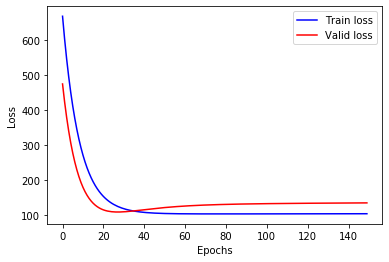

In [2]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label="Train loss")
plt.plot(loss_list_valid,'red',label="Valid loss")
plt.legend(loc=1)

In [ ]:
print("Test_loss:{:.4f}".format(loss(x_test,y_test,W,B).numpy()))

In [ ]:
test_house_id = np.random.randint(0,test_num)
y = y_test[test_house_id]
y_pred = model(x_test,W,B)[test_house_id]
y_predit = tf.reshape(y_pred,()).numpy()
print("House id",test_house_id,"Actual value",y,"Predicted value",y_predit)